# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress  


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []


# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key




# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city    
    city_url = url + "&q=" + city




    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))



    # Add 1 to the record count
    record_count += 1



#     # Run an API request for each of the cities
    try:    
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
    
        city_lat = city_weather["coord"]["lat"] 
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

   
#Append the City information into city_data list
        city_data.append({
        "City": city, 
        "Lat": city_lat, 
        "Lng": city_lng, 
        "Max Temp": city_max_temp,
        "Humidity": city_humidity,
        "Cloudiness": city_clouds,
        "Wind Speed": city_wind,
        "Country": city_country,
        "Date": city_date})

# #If an error is experienced, skip the city
    except:
      print("City not found. Skipping...")
      pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | plettenberg bay
Processing Record 2 of Set 1 | yulara
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | sehithwa
Processing Record 7 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | richards bay
Processing Record 10 of Set 1 | menongue
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | santa maria
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | siilinjarvi
Processing Record 15 of Set 1 | abu zabad
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | elizabethtown
Processing Record 19 of Set 1 | kingori
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | k

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,plettenberg bay,-34.0527,23.3716,14.44,88,100,2.16,ZA,1680981262
1,yulara,-25.2406,130.9889,18.89,43,2,4.72,AU,1680981262
2,rikitea,-23.1203,-134.9692,24.64,63,17,7.22,PF,1680981262
3,hermanus,-34.4187,19.2345,13.78,67,100,1.58,ZA,1680981262
4,sehithwa,-20.4667,22.7167,27.50,31,90,1.83,BW,1680981263


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")


# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,plettenberg bay,-34.0527,23.3716,14.44,88,100,2.16,ZA,1680981262
1,yulara,-25.2406,130.9889,18.89,43,2,4.72,AU,1680981262
2,rikitea,-23.1203,-134.9692,24.64,63,17,7.22,PF,1680981262
3,hermanus,-34.4187,19.2345,13.78,67,100,1.58,ZA,1680981262
4,sehithwa,-20.4667,22.7167,27.50,31,90,1.83,BW,1680981263


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

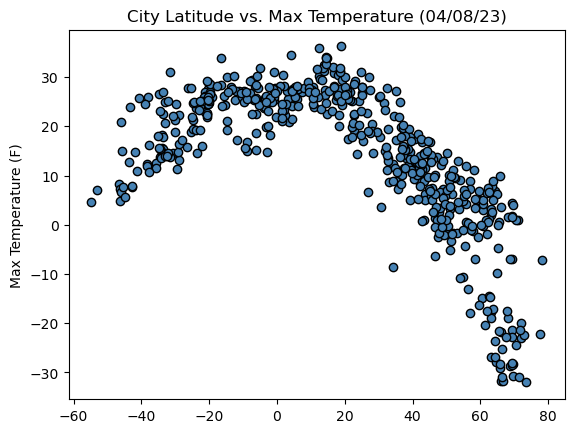

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

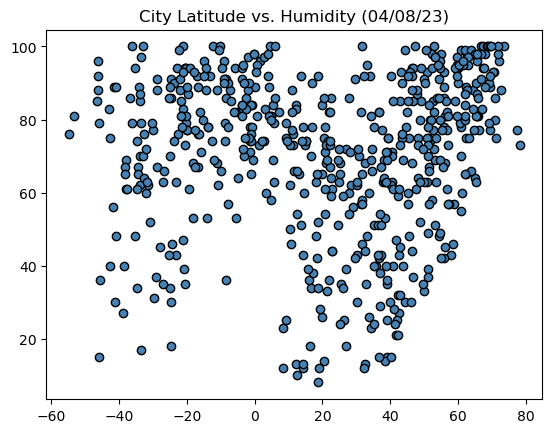

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
    

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

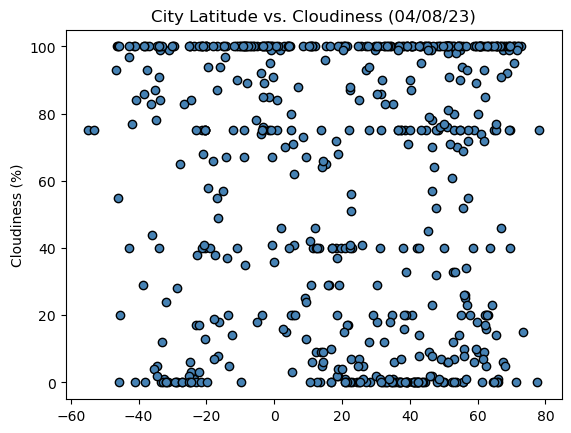

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")
    

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

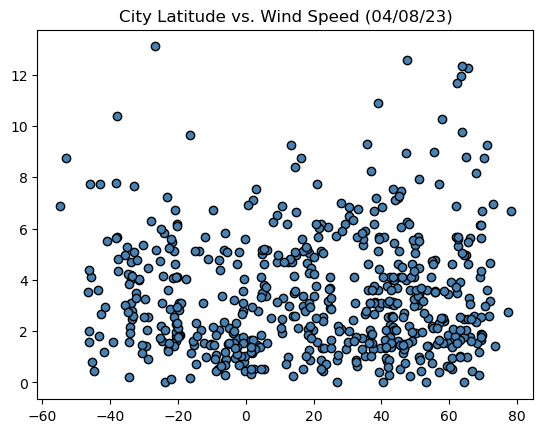

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):   

    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)


    
    # Calculate regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept


    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
        
        
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {r_value}")
    plt.show()    


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df.head()
    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,tuktoyaktuk,69.4541,-133.0374,-21.46,88,96,1.90,CA,1680981263
10,khatanga,71.9667,102.5000,-22.97,96,100,3.19,RU,1680981264
11,siilinjarvi,63.0833,27.6667,2.01,60,0,1.03,FI,1680981264
12,abu zabad,12.3500,29.2500,30.21,9,17,4.69,SD,1680981264
13,katsuura,35.1333,140.3000,8.80,51,1,5.90,JP,1680981265


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


# Display sample data
southern_hemi_df.head()
    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,plettenberg bay,-34.0527,23.3716,14.44,88,100,2.16,ZA,1680981262
1,yulara,-25.2406,130.9889,18.89,43,2,4.72,AU,1680981262
2,rikitea,-23.1203,-134.9692,24.64,63,17,7.22,PF,1680981262
3,hermanus,-34.4187,19.2345,13.78,67,100,1.58,ZA,1680981262
4,sehithwa,-20.4667,22.7167,27.50,31,90,1.83,BW,1680981263


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6476321444332188


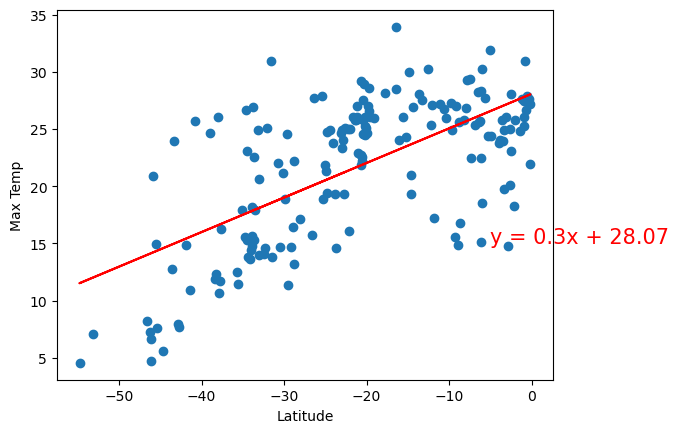

In [69]:
# Call the function
plot_linear_regression(x_values, y_values, 'Max Temp',(-5,15))


# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


    
    

The r-value is: 0.6476321444332188


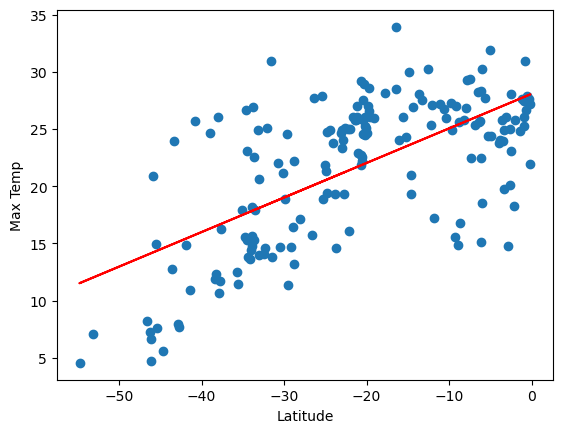

In [40]:
# Linear regression on Southern Hemisphere  
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 'Max Temp',(-50,90))


    

**Discussion about the linear relationship:** Based on this plot graph, the lower latitude with higher temperatures tend to be warmer. The higher the r value is the closer the correlation is between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.8520415465076215


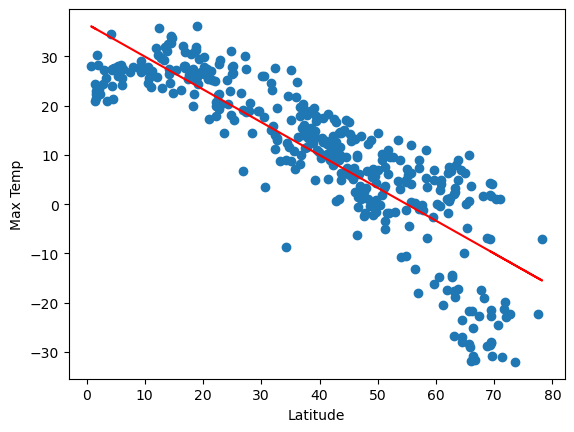

In [47]:
# Northern Hemisphere
y_values = northern_hemi_df["Max Temp"]
x_values = northern_hemi_df["Lat"]  

# Call the function
plot_linear_regression(x_values, y_values, 'Max Temp',(10,40))
    


The r-value is: 0.6476321444332188


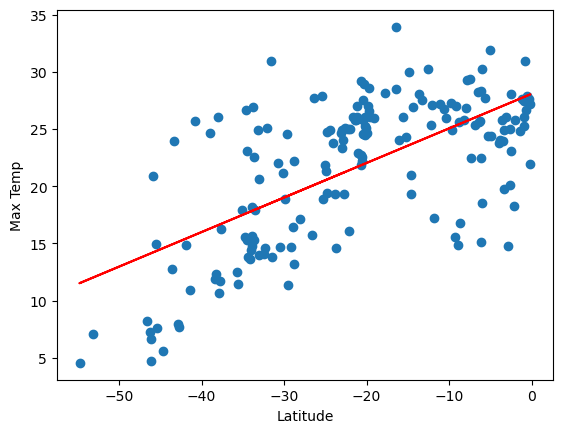

In [53]:
# Southern Hemisphere
y_values = southern_hemi_df["Max Temp"]
x_values = southern_hemi_df["Lat"]

# Call the function
plot_linear_regression(x_values, y_values, 'Max Temp',(-50,90))
    


The higher the r-value (which is indicated in this relationship here), the stronger the relationship between maximum temperature and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2649690535942828


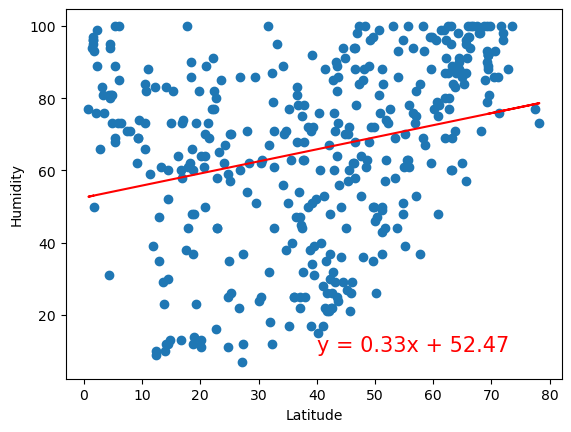

In [58]:
# Northern Hemisphere
y_values = northern_hemi_df["Humidity"]
x_values = northern_hemi_df["Lat"]

# Call the function
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.29258450067591474


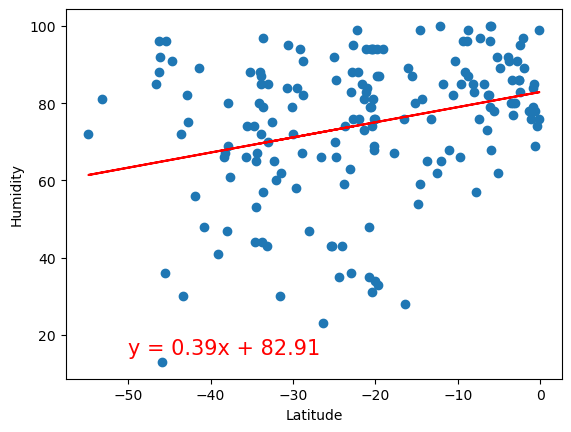

In [62]:
# Southern Hemisphere
y_values = southern_hemi_df["Humidity"]
x_values = southern_hemi_df["Lat"]

# Call the function
plot_linear_regression(x_values, y_values, 'Humidity',(-50,15))

The lower the r-value (which is indicated here) the weaker the relationship is between humidity and latitude. 

The r-value is: 0.06947939653396266


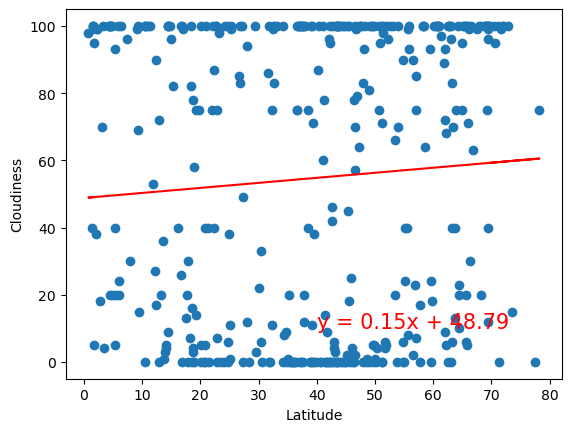

In [65]:
# Northern Hemisphere
y_values = northern_hemi_df["Cloudiness"]
x_values = northern_hemi_df["Lat"]

# Call the function
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,10))

The r-value is: 0.2045554365002457


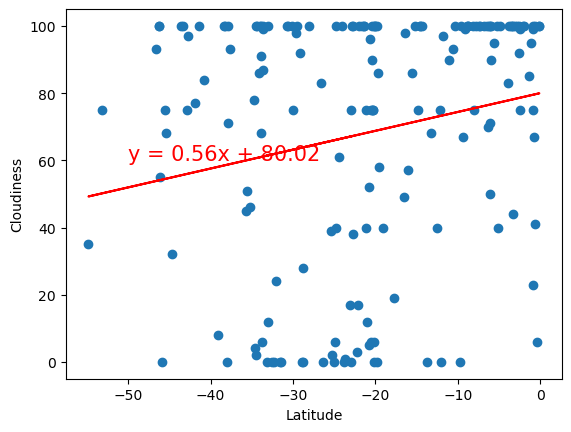

In [67]:
# Southern Hemisphere
y_values = southern_hemi_df["Cloudiness"]
x_values = southern_hemi_df["Lat"]

# Call the function
plot_linear_regression(x_values, y_values, 'Cloudiness',(-50,60))

The lower the r-value (which is indicated here) the weaker the relationship is between cloudiness and latitude. 